<a href="https://colab.research.google.com/github/bioinformatics-inca/genomas-tumorais-2024/blob/main/AulaPratica2_Chamada_de_variantes_somaticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

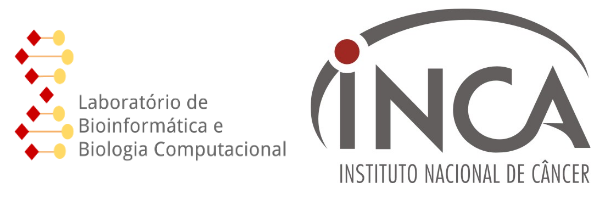

## **Disciplina: Análise de Genomas Tumorais**

# **Aula Prática de Chamada de variantes somáticas**

Prof. Dr. Cristóvão de Lanna

Profª. Dra. Mariana Boroni

Laboratório de Bioinformática e Biologia Computacional (INCA)

Nesta aula, analisaremos os padrões de mutação utilizando a ferramenta maftools. Essa biblioteca em R nos permite gerar diferentes gráficos a partir de arquivos MAF e interpretar os resultados das chamadas de variante.

Primeiro vamos instalar e carregar as bibliotecas necessárias para a aula, assim como os arquivos de entrada.

In [ ]:
# Instalação dos pacotes
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(version = "3.20")

BiocManager::install('maftools')
install.packages(c('dplyr','R.utils'))

# pacote maftools
library(maftools)
# dplyr para facilitar a manipulação de tabelas
library(dplyr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'BiocVersion'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'maftools'

also installing the dependencies ‘Rhtslib’, ‘DNAcopy’, ‘pheatmap’, ‘zlibbioc’


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter,

In [ ]:
# Também vamos carregar os arquivos utilizados na aula
download.file("https://github.com/bioinformatics-inca/genomas-tumorais-2024/raw/main/Data/mafs/Grade2_TCGA-OV_MAF.rda", "Grade2_TCGA-OV_MAF.rda")
download.file("https://github.com/bioinformatics-inca/genomas-tumorais-2024/raw/main/Data/mafs/Grade3_TCGA-OV_MAF.rda", "Grade3_TCGA-OV_MAF.rda")
download.file("https://github.com/bioinformatics-inca/genomas-tumorais-2024/raw/main/Data/mafs/clinicaldata.rda", "clinicaldata.rda")

load("Grade2_TCGA-OV_MAF.rda")
load("Grade3_TCGA-OV_MAF.rda")
load("clinicaldata.rda")

## Gerando Oncoplots

### Lendo arquivos MAF com o maftools

A primeira etapa é a leitura dos arquivos MAF no objeto próprio da biblioteca maftools. Os dados utilizados nessa aula consistem em tabelas baixadas do TCGA relativas a amostras de câncer de ovário. Nesse caso, selecionamos 5 amostras de tumores de Grau 2 e 5 de Grau 3 e as agrupamos previamente. Os objetos estão como tabelas, então vamos convertê-los em objetos MAF.

In [ ]:
samplesG2 <- read.maf(samplesG2, clinicalData = clinical_G2)
samplesG3 <- read.maf(samplesG3, clinicalData = clinical_G3)

-Validating
-Silent variants: 108 
-Summarizing
--Mutiple centers found
WUGSC;BI--Possible FLAGS among top ten genes:
  TTN
-Processing clinical data
-Finished in 0.079s elapsed (0.077s cpu) 
-Validating
-Silent variants: 138 
-Summarizing
--Mutiple centers found
BI;WUGSC-Processing clinical data
-Finished in 0.095s elapsed (0.087s cpu) 


❗Caso você tenha arquivos MAF de amostras individuais, é possível ler esses arquivos diretamente usando a função `merge_mafs`. Segue um exemplo abaixo:

```
# Listando arquivos maf e lendo como um objeto único
mafs = list.files(path = "/directory/maf_files/", pattern = "*.\\.maf$", full.names =TRUE)
all_samples = merge_mafs(mafs = mafs)
```


### Criando um oncoplot

Tendo os objetos apropriados, podemos criar um oncoplot a partir deles:

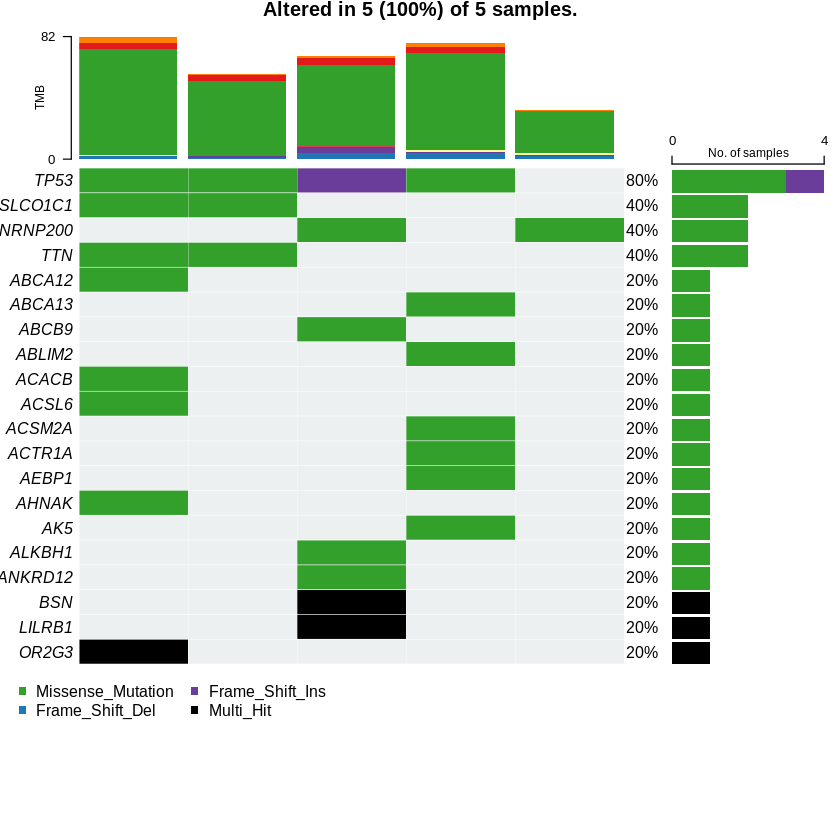

In [ ]:
oncoplot(maf = samplesG2)

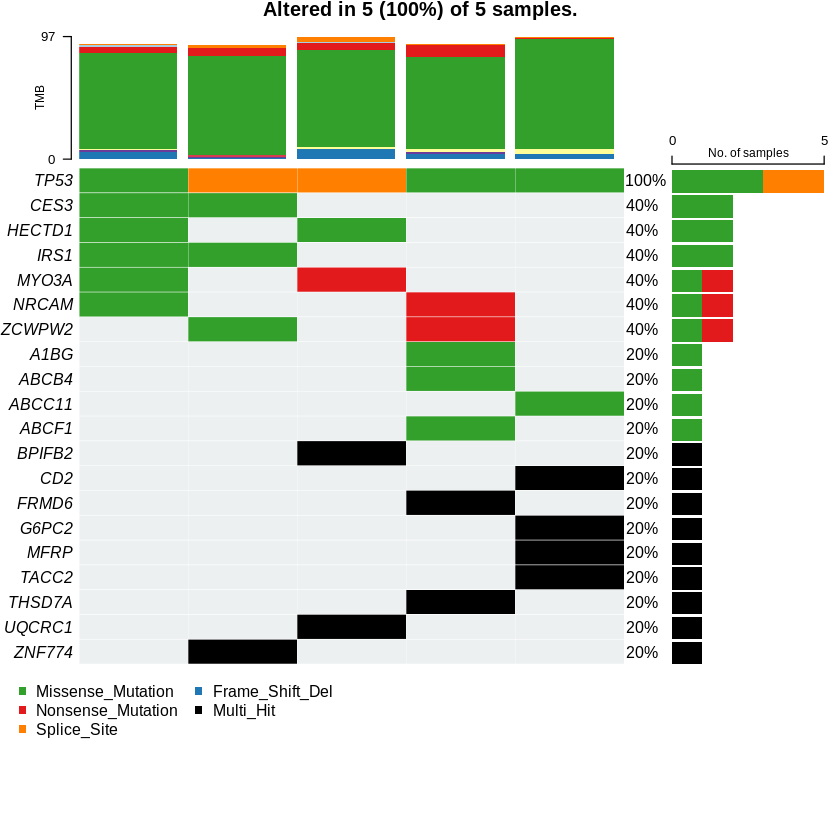

In [ ]:
oncoplot(maf = samplesG3)

Este simples comando exibe por padrão um oncoplot com 20 genes. Também exibe a porcentagem de amostras do seu conjunto que possuem alterações nesses genes e os tipos de alteração identificadas.
Qual parece ser a forma como a função seleciona estes 20 genes?

Também podemos mudar a quantidade de genes que aparecem no plot com o parâmetro `top`. Podemos testar diferentes quantidades de genes nos nossos oncoplots.

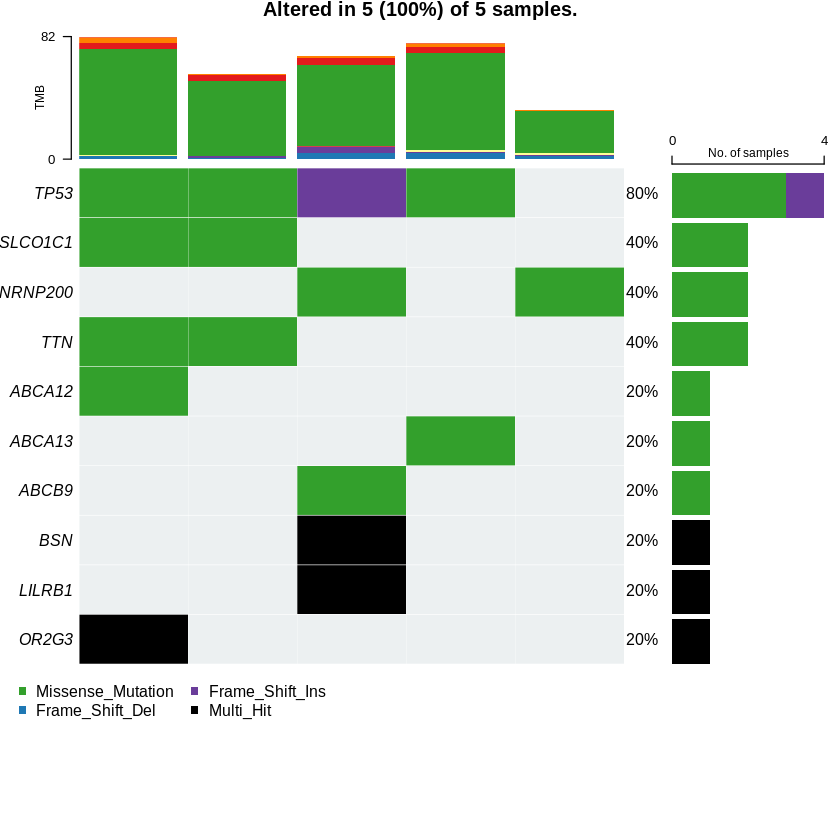

In [ ]:
oncoplot(maf = samplesG2, top=10)

In [ ]:
oncoplot(maf = samplesG3, top=10)

Como você pode ter percebido, o único critério para selecionar os genes que aparecem no plot é a quantidade de mutações, sem levar em conta a composição ou tamanho dos genes afetados.
Por exemplo, o gene *TTN* é um gene polimórfico e muito grande, tão grande a ponto de ter uma maior quantidade de mutações o afetando simplesmente por conta desta característica. Portanto, pode não ser necessariamente relevante para o câncer de ovário. Ele também foi apontado como possível FLAG pelo maftools, como podemos observar na mensagem da leiturad os arquivos. Neste caso, podemos apontar para o oncoplot que esse gene deve ser excluído. Para isso iremos usar o parâmetro `genesToIgnore`:

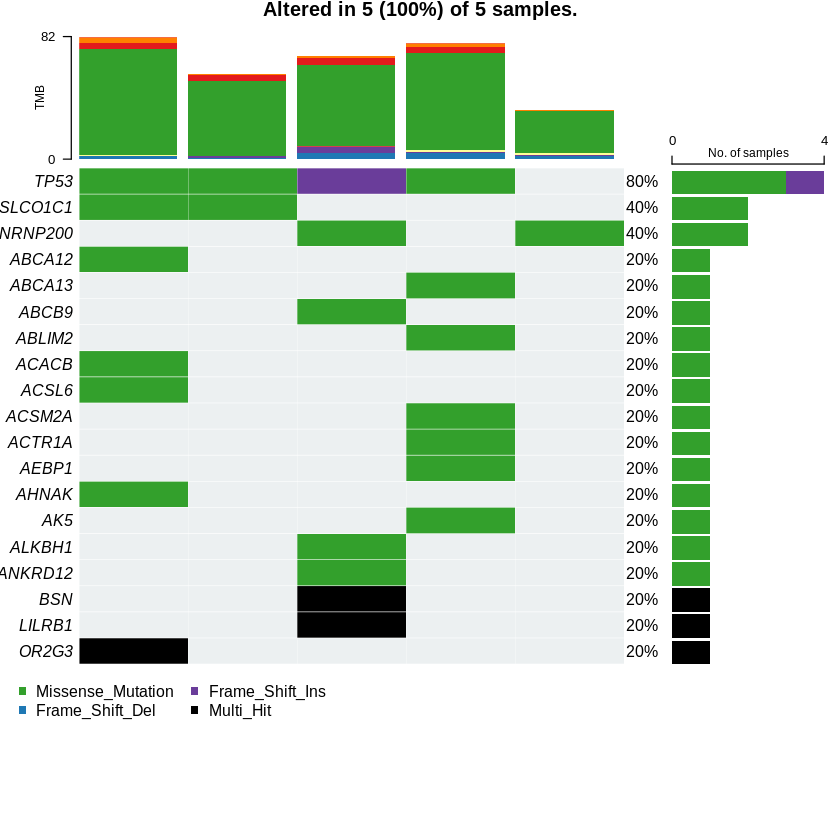

In [ ]:
oncoplot(samplesG2, genesToIgnore = c("TTN"))

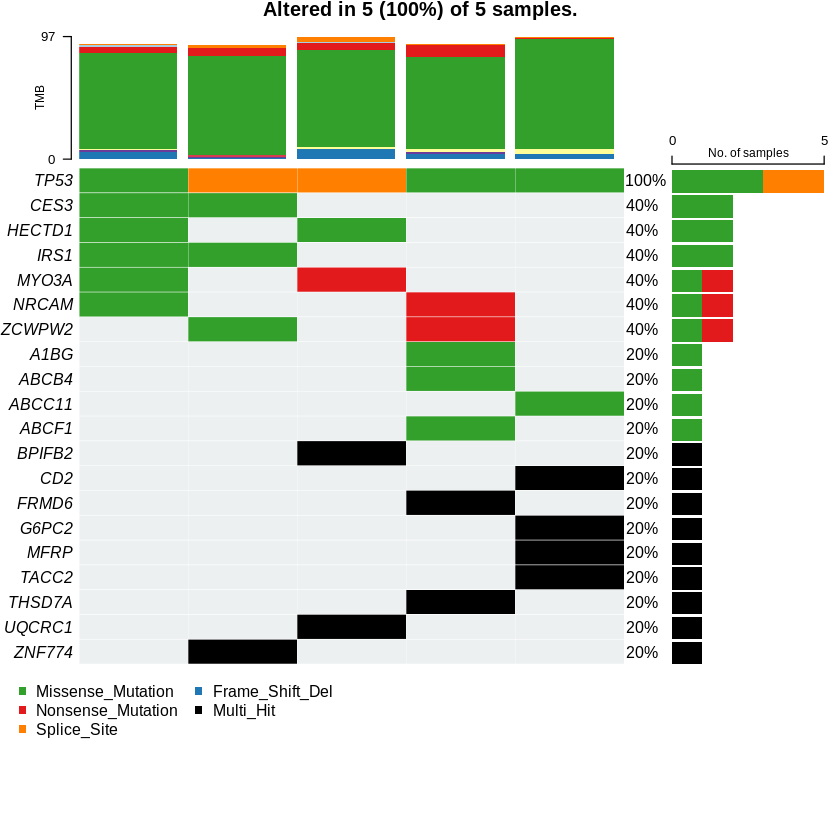

In [ ]:
oncoplot(samplesG3, genesToIgnore = c("TTN"))

Outra opção é criar um oncoplot comparativo entre os dois grupos. Isso nos permite ver facilmente as diferenças nos padrões de variantes.

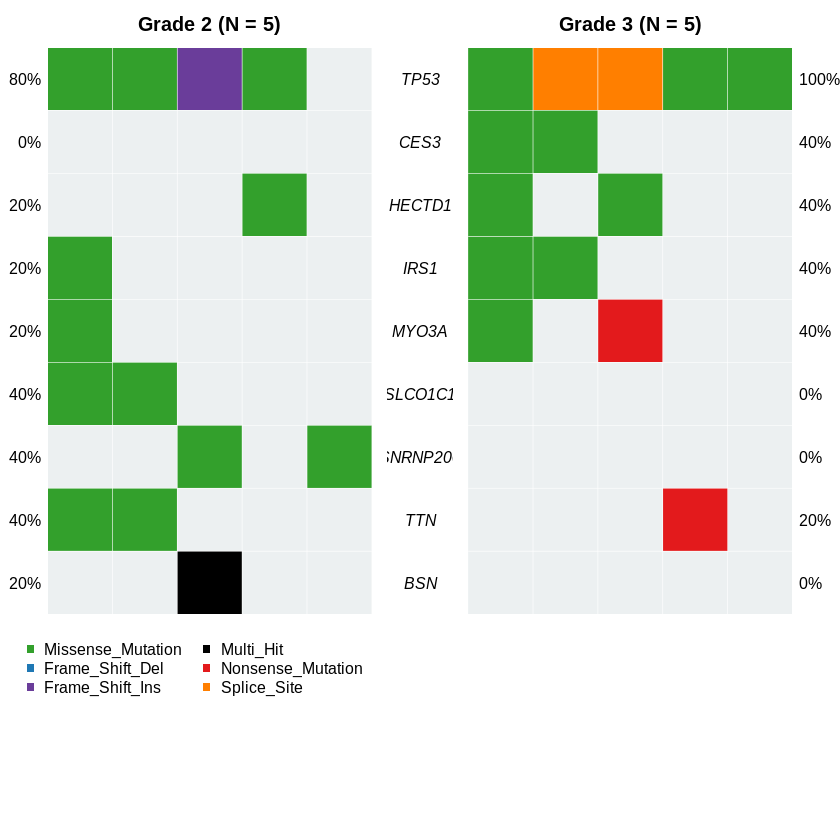

In [ ]:
coOncoplot(m1 = samplesG2, m1Name = "Grade 2", m2 = samplesG3, m2Name = "Grade 3")

Podemos também selecionar alguns genes de interesse para fazer um oncoplot específico. Podemos, por exemplo, selecionar genes específicos:

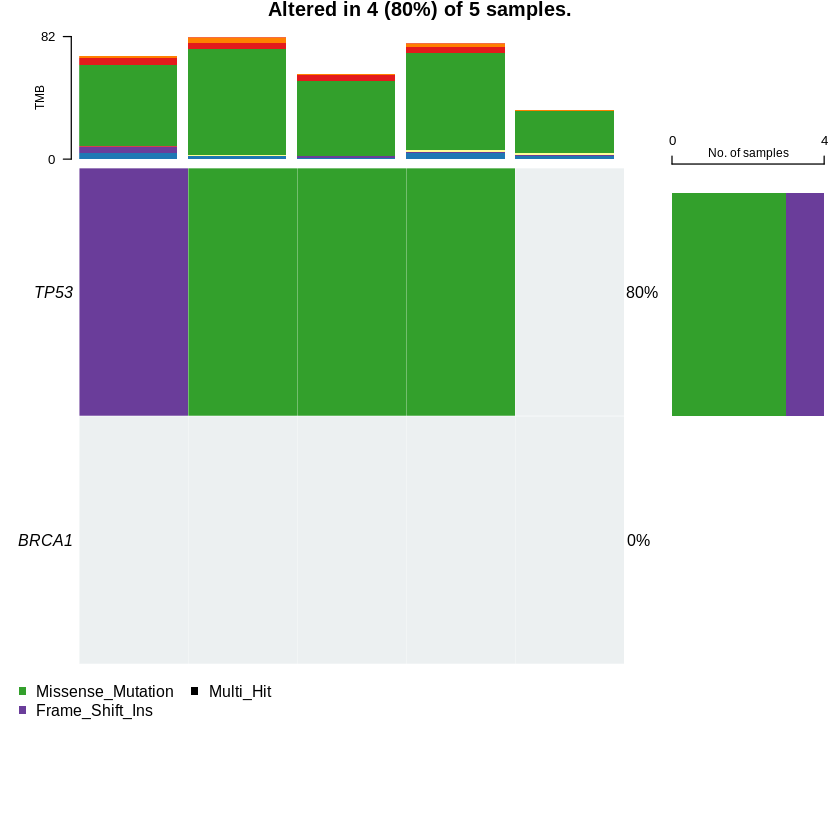

In [ ]:
oncoplot(samplesG2, genes = c("TP53","BRCA1"))

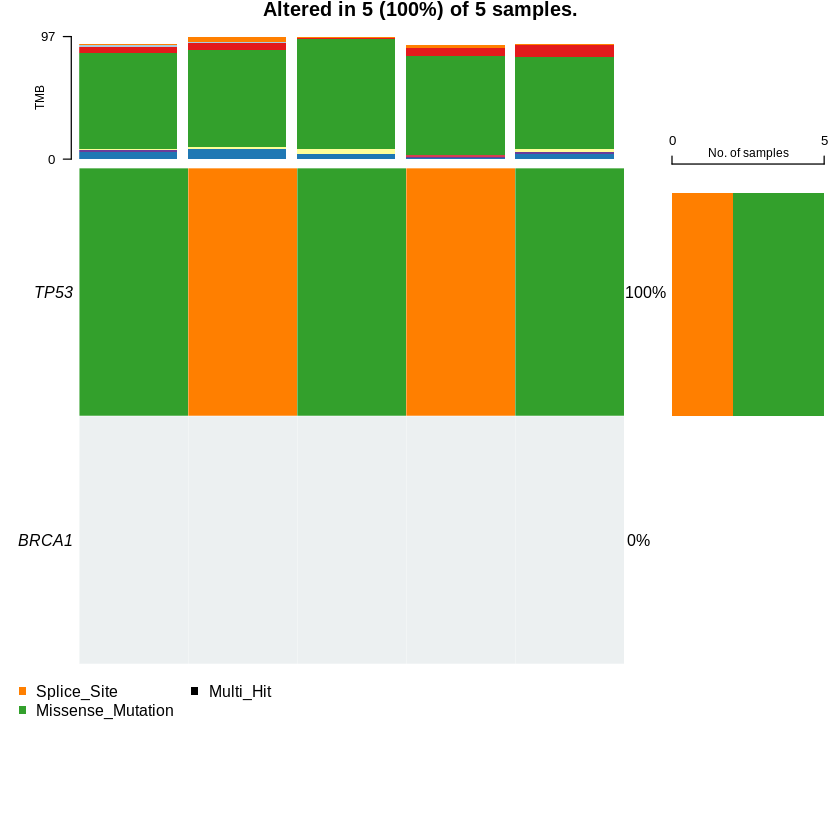

In [ ]:
oncoplot(samplesG3, genes = c("TP53","BRCA1"))

### Anotando o oncoplot

Também podemos adicionar anotações ao oncoplot. Uma das informações que podemos acrescentar são transições e transversões, que podem nos ajudar a identificar padrões relacionados a fontes específicas de dano ao DNA.

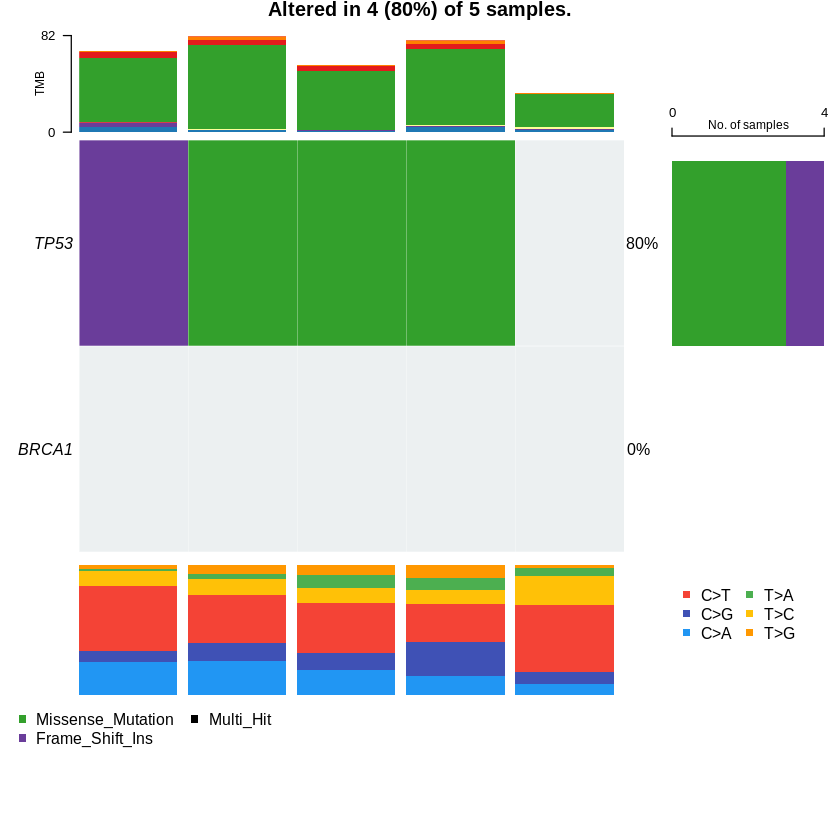

In [ ]:
oncoplot(samplesG2, genes = c("TP53","BRCA1"), draw_titv = TRUE)

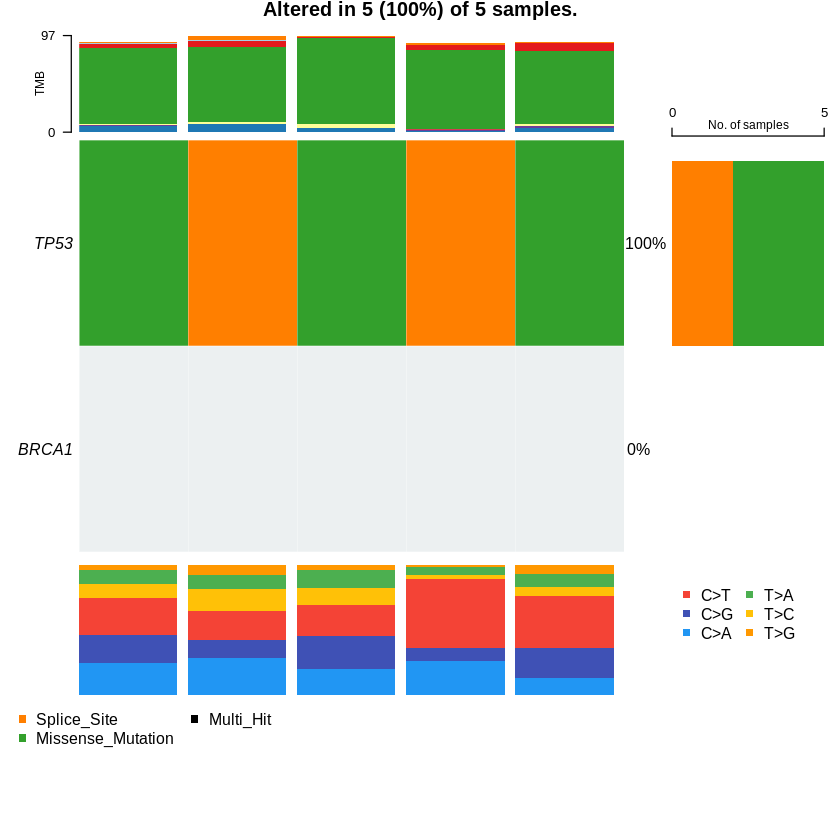

In [ ]:
oncoplot(samplesG3, genes = c("TP53","BRCA1"), draw_titv = TRUE)

Podemos incluir também dados clínicos na anotação do oncoplot aproveitando a tabela que incluímos com o MAF. Abaixo temos um exemplo mostrando o status vital das pacientes.

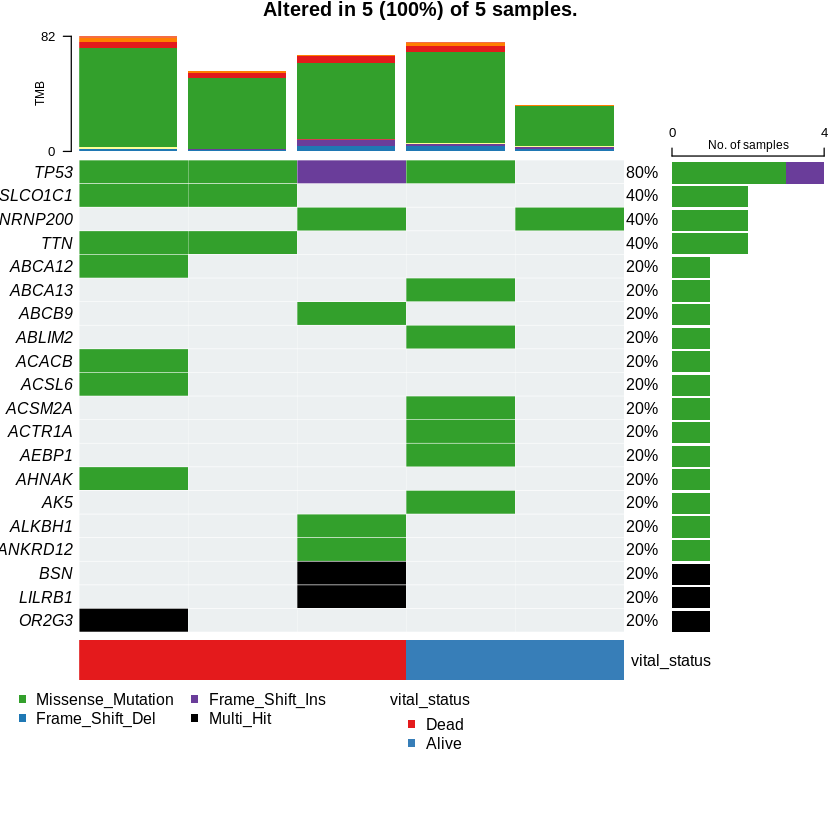

In [ ]:
oncoplot(samplesG2, clinicalFeatures = "vital_status")

#### Adicionando vias
A biblioteca maftools possui a opção de plotar as vias afetadas e os genes correspondentes a essas vias. Por padrão, o maftools plota as 3 vias mais afetadas.

Drawing upto top 3 mutated pathways



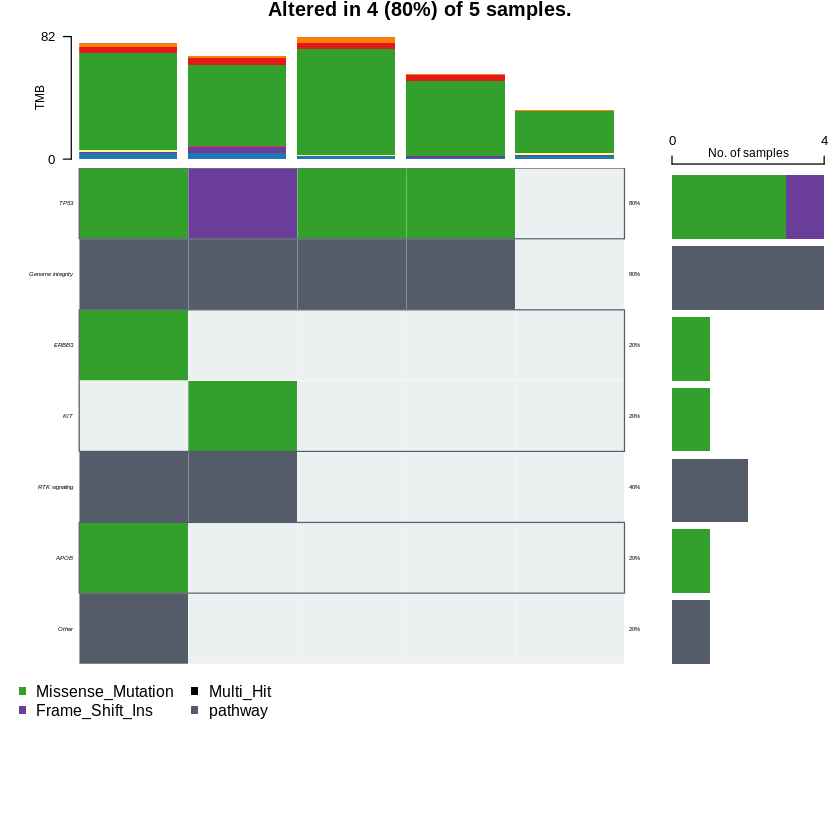

In [ ]:
oncoplot(maf=samplesG2, pathways= 'smgbp', gene_mar =5, fontSize =0.3)

Drawing upto top 3 mutated pathways



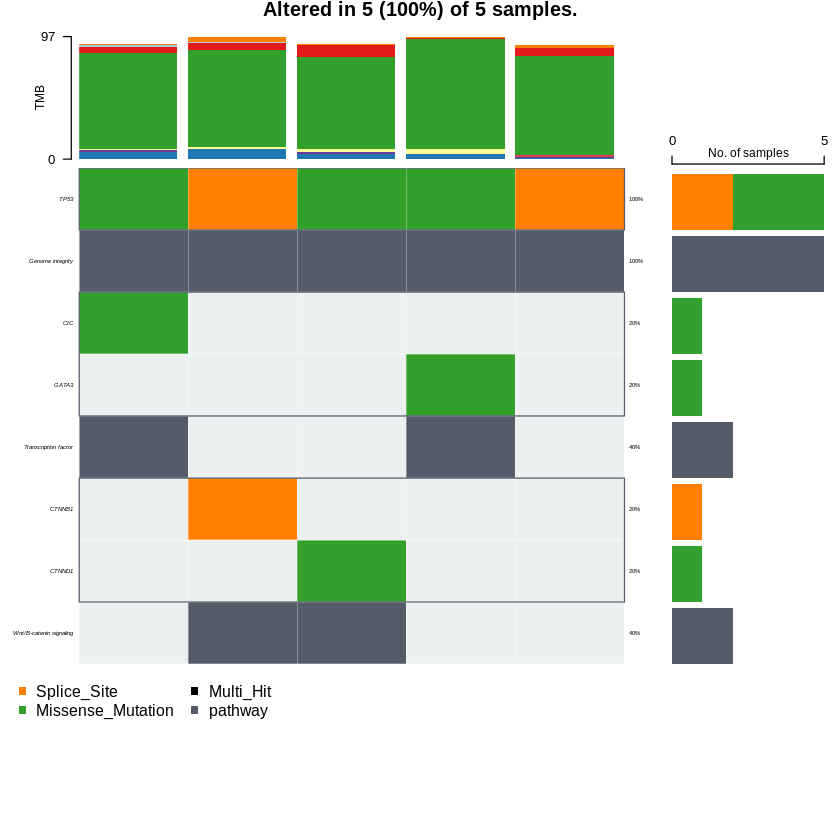

In [ ]:
oncoplot(maf=samplesG3, pathways= 'smgbp', gene_mar =5, fontSize =0.3)

#### Outras opções

O maftools pode gerar outros gráficos úteis. Um deles é um sumário das variantes, mostrando variantes por amostra, tipos e classificação.

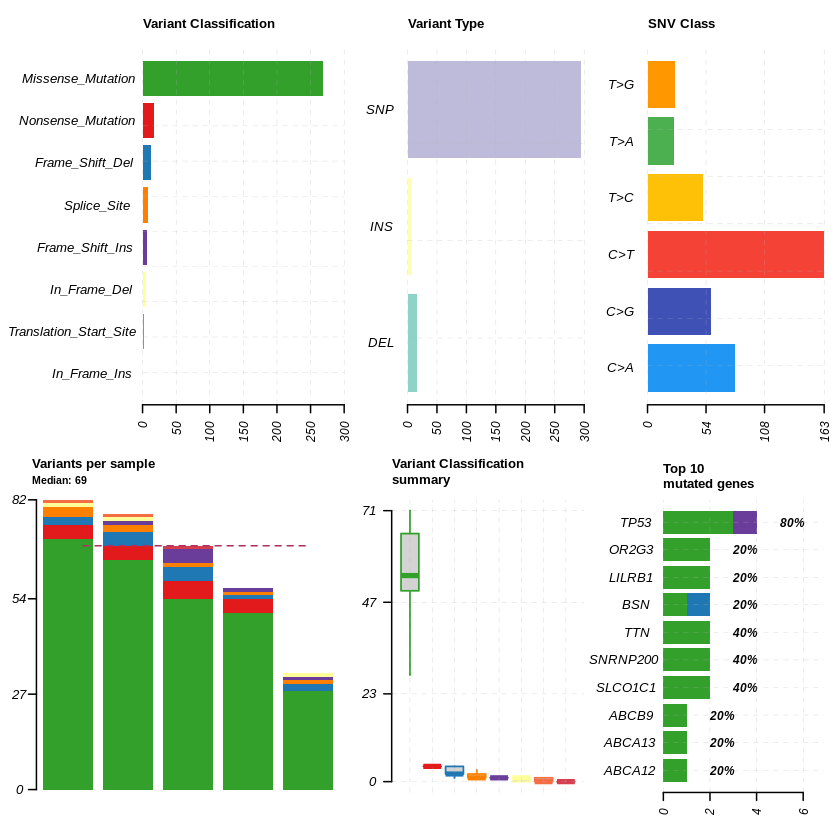

In [ ]:
plotmafSummary(maf = samplesG2, addStat = 'median', dashboard = TRUE)

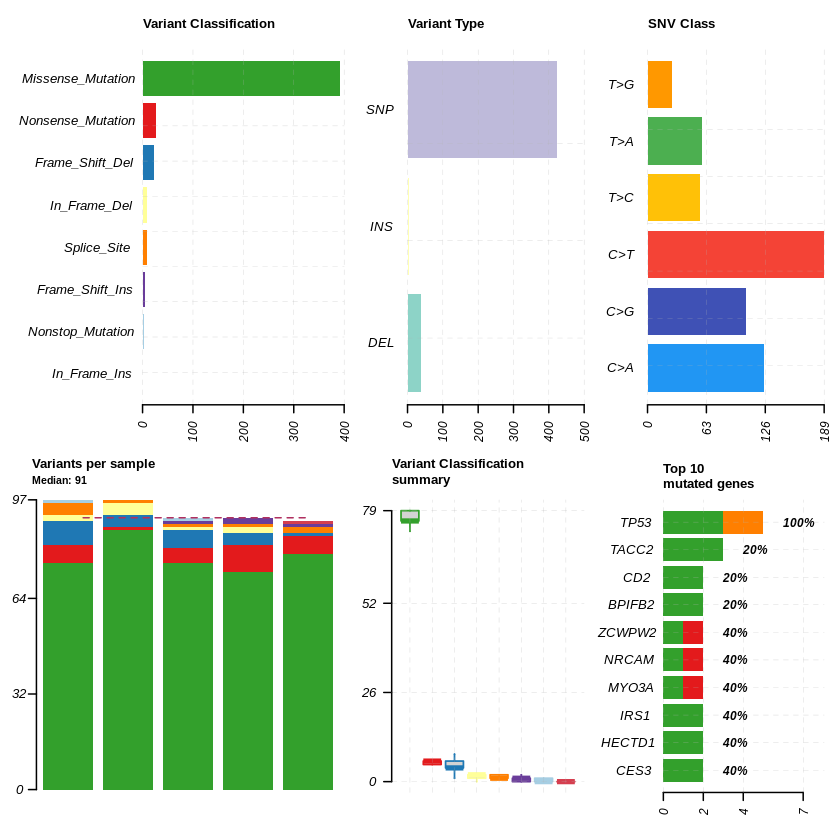

In [ ]:
plotmafSummary(maf = samplesG3, addStat = 'median', dashboard = TRUE)

Também é possível gerar gráficos específicos para transições e transversões.

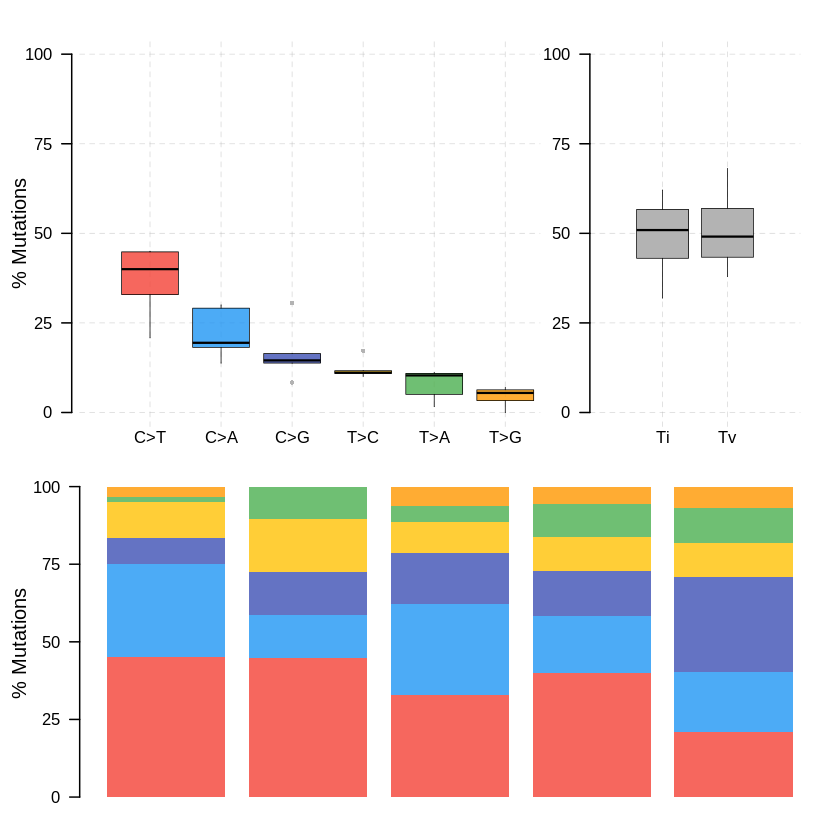

In [ ]:
# Identificação das transições e transversões
G2_titv <- titv(samplesG2, plot = FALSE)

# Gráficos de transições e transversões
plotTiTv(G2_titv)

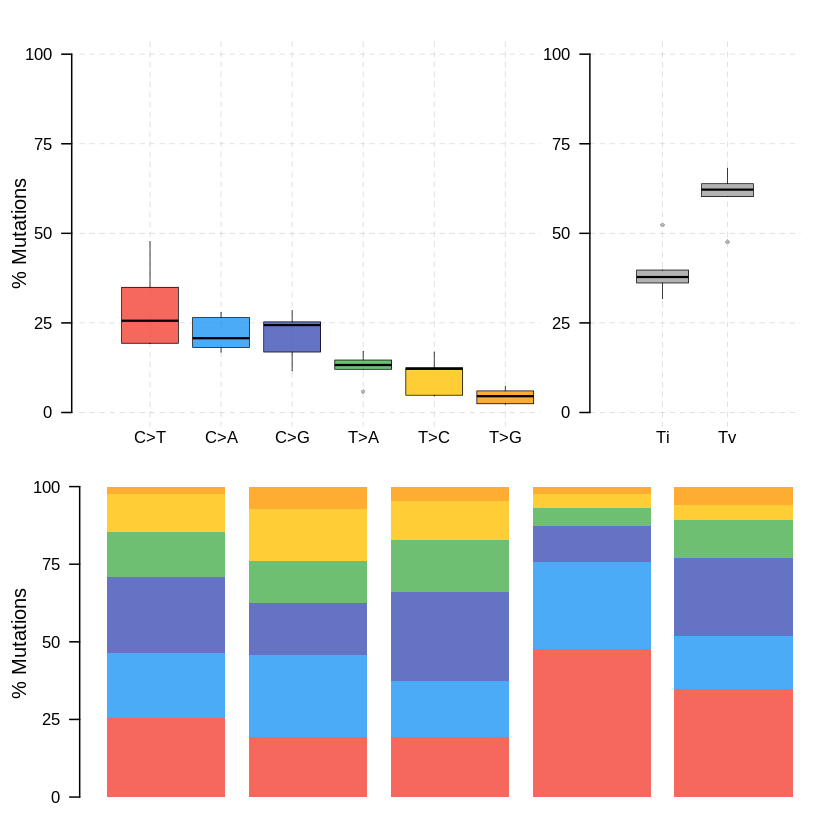

In [ ]:
# Identificação das transições e transversões
G3_titv <- titv(samplesG3, plot = FALSE)

# Gráficos de transições e transversões
plotTiTv(G3_titv)

Podemos ainda criar lollipop plots ou "gráficos de pirulito", que mostram posições e trocas de aminoácidos causadas na proteína por consequência das mutações. Para isso, é preciso escolher uma proteína de interesse.

8 transcripts available. Use arguments refSeqID or proteinID to manually specify tx name.



     HGNC    refseq.ID   protein.ID aa.length
   <char>       <char>       <char>     <num>
1:   TP53    NM_000546    NP_000537       393
2:   TP53 NM_001126112 NP_001119584       393
3:   TP53 NM_001126113 NP_001119585       346
4:   TP53 NM_001126114 NP_001119586       341
5:   TP53 NM_001126115 NP_001119587       261
6:   TP53 NM_001126116 NP_001119588       209
7:   TP53 NM_001126117 NP_001119589       214
8:   TP53 NM_001126118 NP_001119590       354


Using longer transcript NM_000546 for now.

Assuming protein change information are stored under column HGVSp_Short. Use argument AACol to override if necessary.



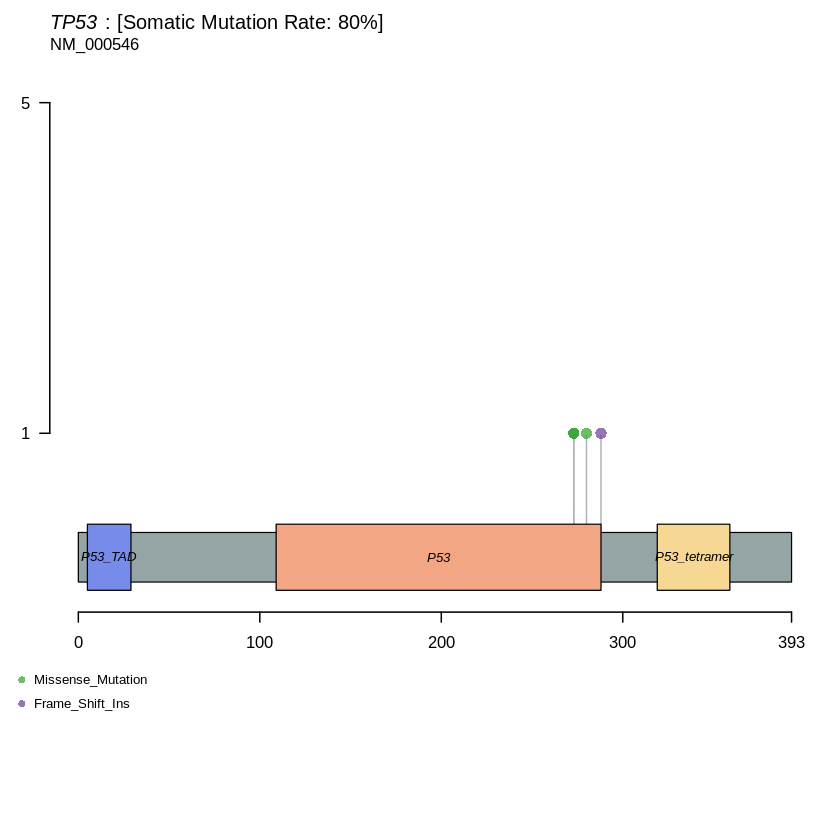

In [ ]:
lollipopPlot(maf=samplesG2, gene="TP53", showMutationRate=TRUE)

É possível identificar as variantes usando a opção `labelPos`. Podemos identificar quantas posições quisermos, desde que haja alterações nessas posições. Para fazer esse plot, é necessário que a coluna relativa à troca de aminoácidos esteja presente no MAF.

8 transcripts available. Use arguments refSeqID or proteinID to manually specify tx name.



     HGNC    refseq.ID   protein.ID aa.length
   <char>       <char>       <char>     <num>
1:   TP53    NM_000546    NP_000537       393
2:   TP53 NM_001126112 NP_001119584       393
3:   TP53 NM_001126113 NP_001119585       346
4:   TP53 NM_001126114 NP_001119586       341
5:   TP53 NM_001126115 NP_001119587       261
6:   TP53 NM_001126116 NP_001119588       209
7:   TP53 NM_001126117 NP_001119589       214
8:   TP53 NM_001126118 NP_001119590       354


Using longer transcript NM_000546 for now.

Assuming protein change information are stored under column HGVSp_Short. Use argument AACol to override if necessary.



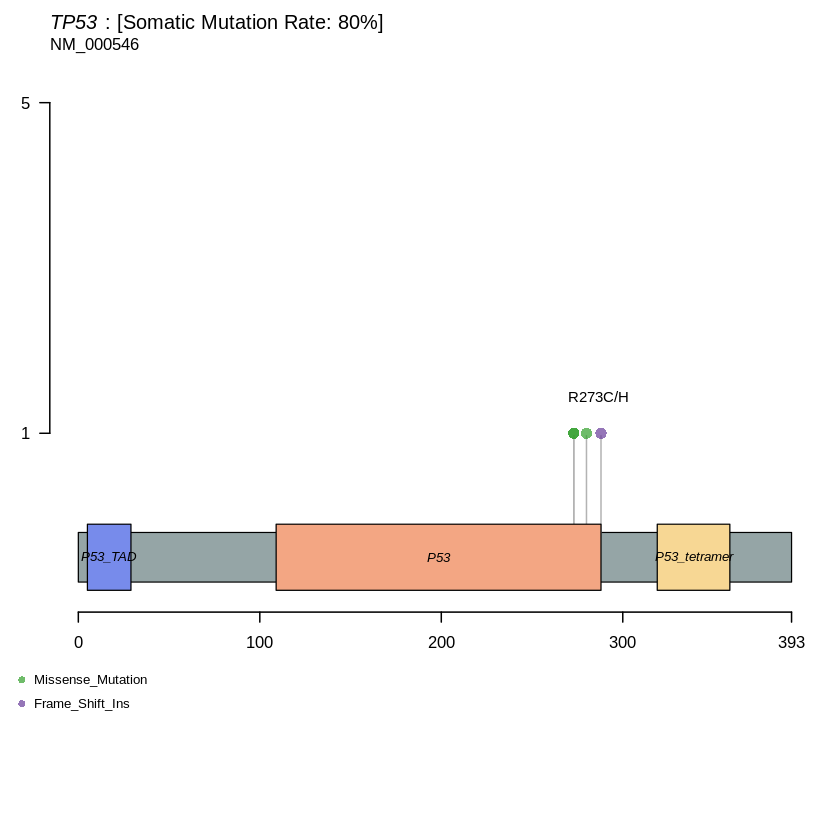

In [ ]:
lollipopPlot(maf=samplesG2, gene="TP53", showMutationRate=TRUE, labelPos=273)

Referências

*   Mayakonda A, Lin D, Assenov Y, Plass C, Koeffler PH (2018). Maftools: efficient and comprehensive analysis of somatic variants in cancer. Genome Research. doi: 10.1101/gr.239244.118.
*   WCS Cancer Genome Analysis - Latin America and the Caribbean https://github.com/WCSCourses/Cancer_Genome_Analysis23

